In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.metrics import r2_score

In [2]:
def compute_R2(data):
    out = r2_score(data["true"], data['pred'])
    return out

In [3]:
fontsize = 12

In [4]:
sns.set_theme(font="Arial", style="ticks", rc={"font.size": fontsize,"axes.titlesize":fontsize,"axes.labelsize":fontsize, 
                                               "xtick.labelsize": fontsize, "ytick.labelsize": fontsize, "legend.fontsize": fontsize})
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
mpl.rcParams['font.size'] = fontsize


In [5]:
markers = ['mek12', 'erk12', 'mkk4', 'jnk12', 'ikk', 'ikb', 'ras', 'map3k7','pi3k', 'map3k1', 'akt', 
           'p38', 'hsp27']
inputs=['igf1', 'il1a', 'tgfa', 'tnfa']

In [6]:
pred = pd.read_csv("/dccstor/ipc1/CAR/BFN/Model/Shuffling/network_pred.csv", index_col=0)
pred["iter"] = [0]*1000+[1]*1000+[2]*1000+[3]*1000+[4]*1000+[5]*1000+[6]*1000+[7]*1000+[8]*1000+[9]*1000
pred["iter"] = pred["iter"].astype(str)
pred = pred.drop(inputs, axis=1)
shuffled_pred = pd.read_csv("/dccstor/ipc1/CAR/BFN/Model/Shuffling/shuffled_network_pred.csv",  index_col=0)
shuffled_pred["iter"] = [0]*1000+[1]*1000+[2]*1000+[3]*1000+[4]*1000+[5]*1000+[6]*1000+[7]*1000+[8]*1000+[9]*1000
shuffled_pred["iter"] = shuffled_pred["iter"].astype(str)
shuffled_pred = shuffled_pred.drop(inputs, axis=1)
true = pd.read_csv("/dccstor/ipc1/CAR/BFN/Model/Shuffling/teacher_data.csv",  index_col=0)

mek12
erk12
mkk4
jnk12
ikk
ikb
ras
map3k7
pi3k
map3k1
akt
p38
hsp27


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


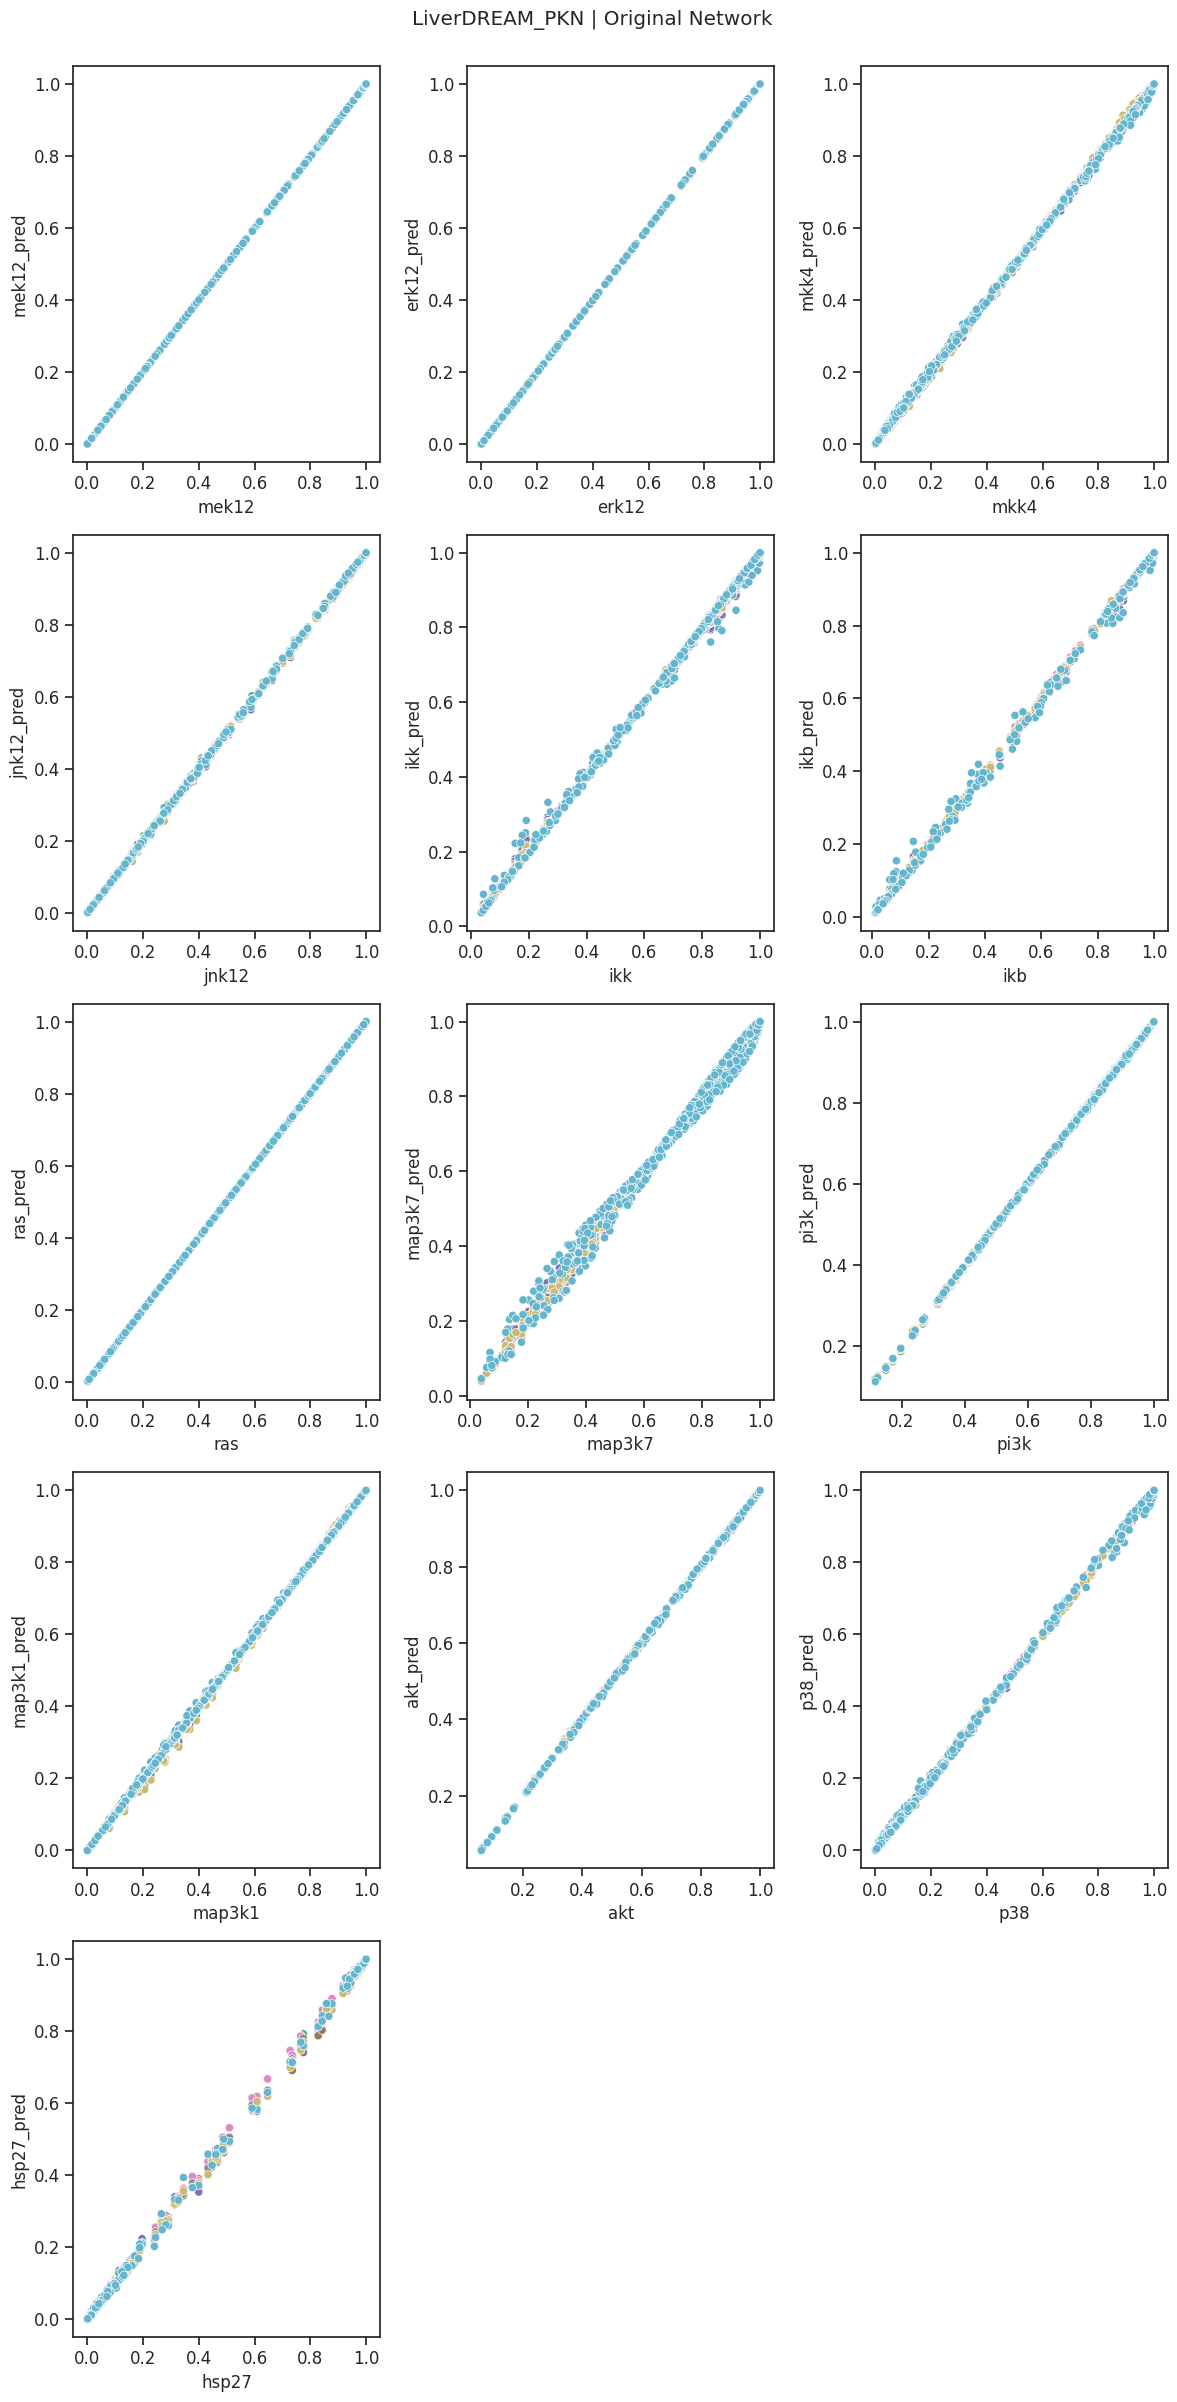

In [7]:
fig,axs = plt.subplots(nrows=5,ncols=3)
axs=axs.flatten()                   
for i in range(15):
    ax=axs[i]
    if i>=len(markers):
        ax.remove()
    else:
        m=markers[i]
        print(m)
        sns.scatterplot(data=pred, x=m, y=f"{m}_pred", hue="iter", ax=ax, legend=False)
        plt.legend([], [], frameon=None)

fig.set_size_inches(12,24)
fig.suptitle("LiverDREAM_PKN | Original Network",y=1.0)
fig.tight_layout()
plt.savefig("/dccstor/ipc1/CAR/BFN/Figures/Shuffling_predictions.pdf", bbox_inches="tight")

mek12
erk12
mkk4
jnk12
ikk
ikb
ras
map3k7
pi3k
map3k1
akt
p38
hsp27


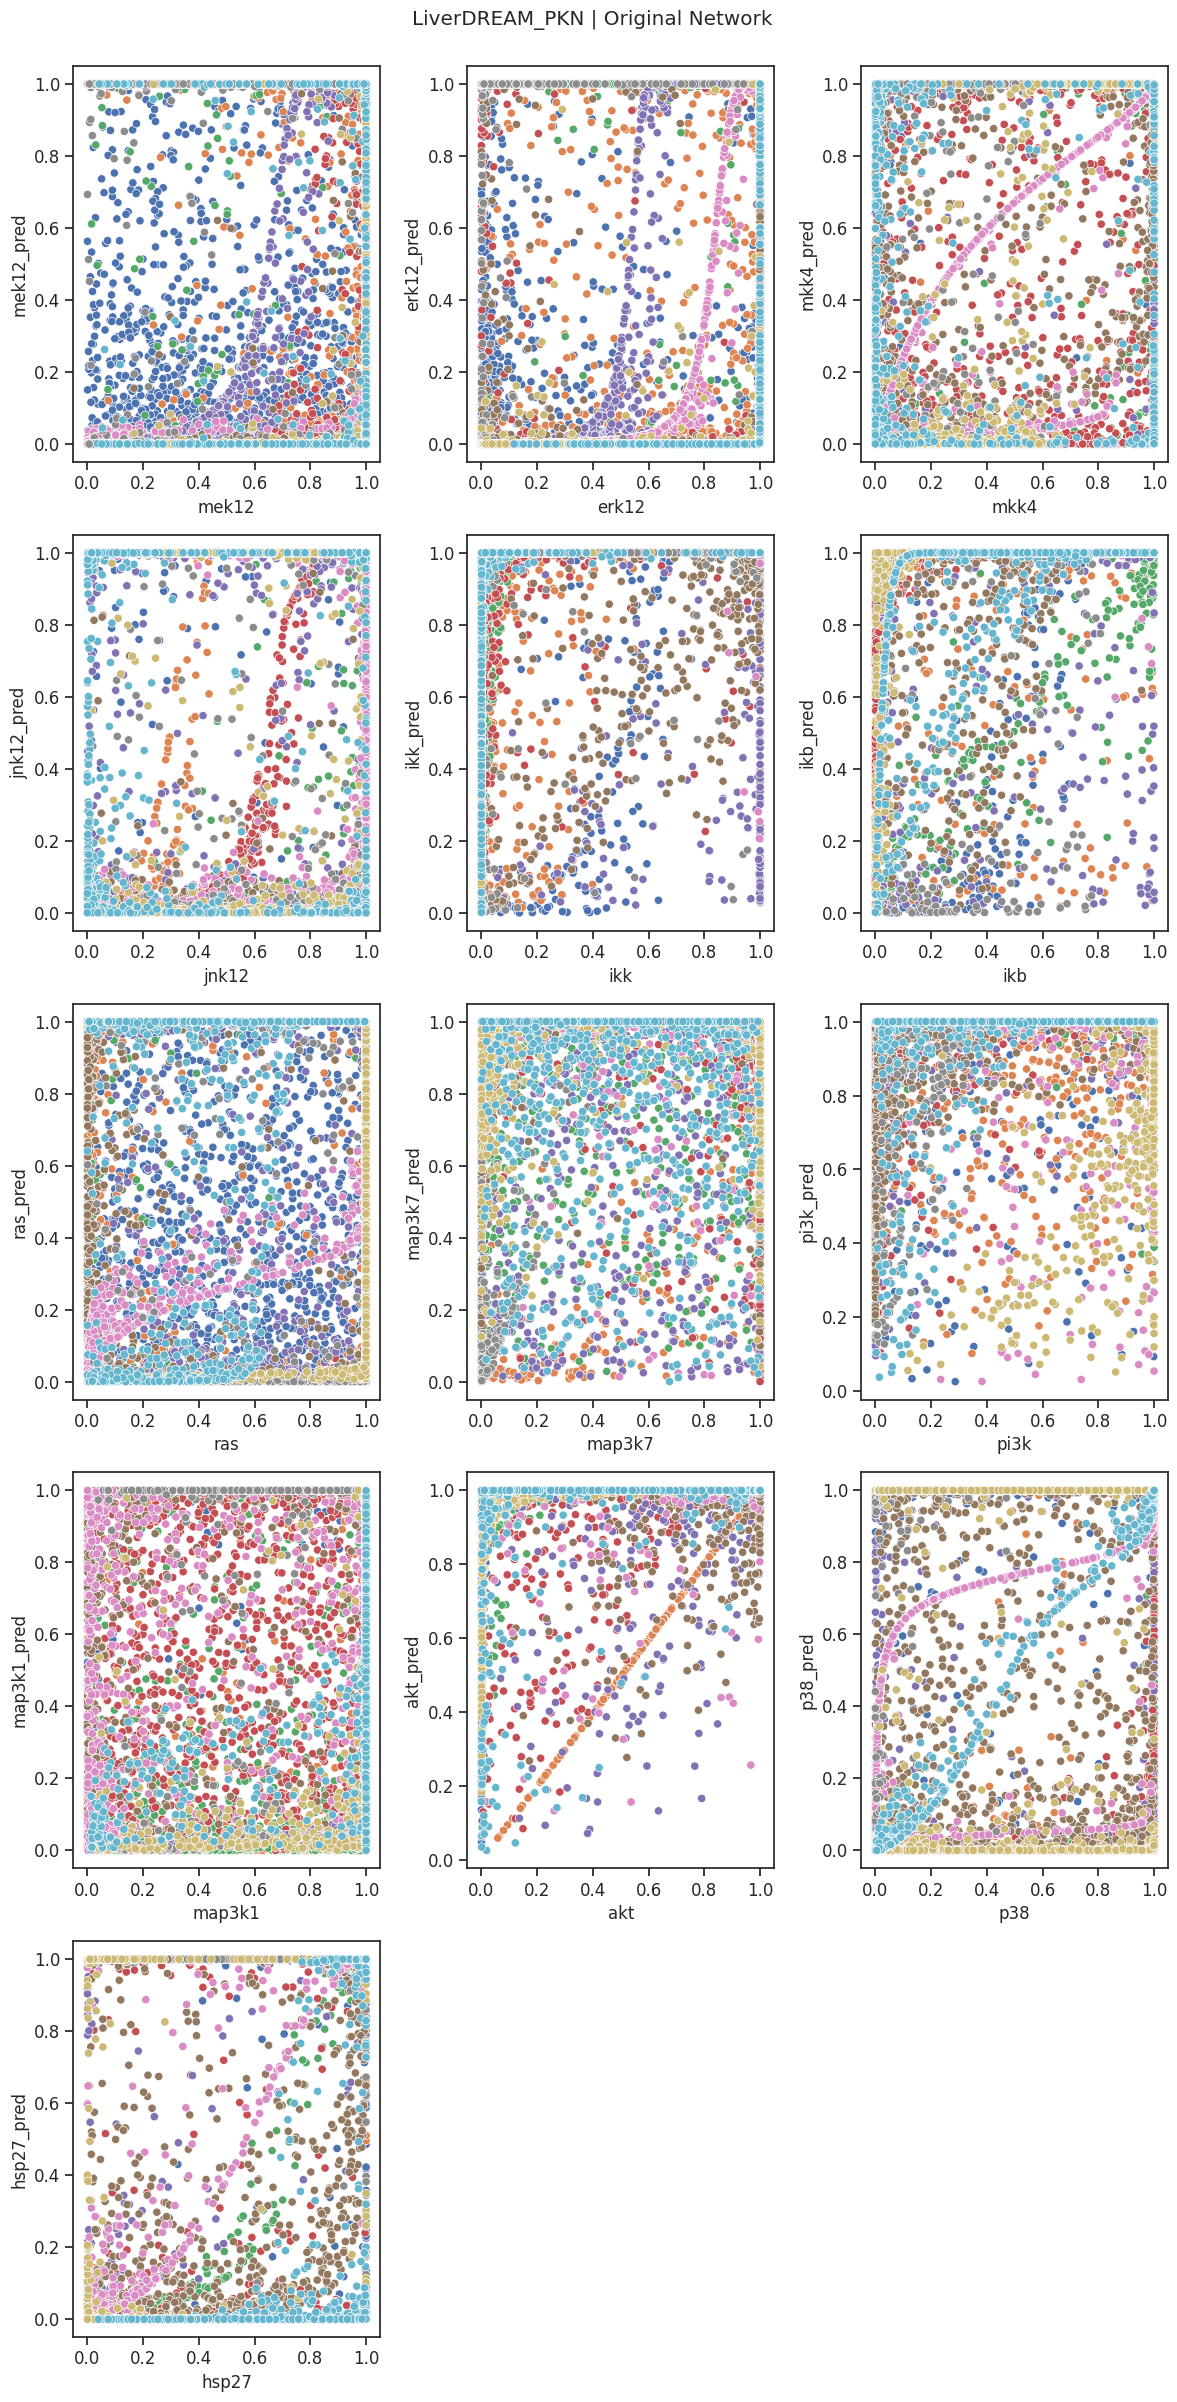

In [8]:
fig,axs = plt.subplots(nrows=5,ncols=3)
axs=axs.flatten()                   
for i in range(15):
    ax=axs[i]
    if i>=len(markers):
        ax.remove()
    else:
        m=markers[i]
        print(m)
        sns.scatterplot(data=shuffled_pred, x=m, y=f"{m}_pred", hue="iter", ax=ax, legend=False)
        plt.legend([], [], frameon=None)

fig.set_size_inches(12,24)
fig.suptitle("LiverDREAM_PKN | Original Network",y=1.0)
fig.tight_layout()
plt.savefig("/dccstor/ipc1/CAR/BFN/Figures/Shuffling_shuffled_predictions.pdf", bbox_inches="tight")

In [9]:
temp = pred.reset_index(drop=True).reset_index(drop=False).melt(id_vars=["iter", "index"], var_name="marker")
temp["true_or_pred"] = [m.split("_")[1] if "pred" in m else "true" for m in temp["marker"]]
temp["marker"] = [m.split("_")[0] if "pred" in m else m for m in temp["marker"]]
temp = temp.pivot_table(index=["index", "marker", "iter"], columns="true_or_pred").reset_index()
temp = temp.T.reset_index()
temp["level_0"] = ["index", "marker", "iter", "pred", "true"]
temp=temp.drop("true_or_pred", axis=1)
temp=temp.rename(columns={"level_0": ""})
temp=temp.set_index("").T
temp=temp.drop("index", axis=1)
temp["sq_error"] = (temp["pred"] - temp ["true"])**2
temp

,marker,iter,pred,true,sq_error
0,akt,0,0.999997,0.999997,0.0
1,erk12,0,0.140961,0.141448,0.0
2,hsp27,0,0.999985,0.999994,0.0
3,ikb,0,1.0,1.0,0.0
4,ikk,0,1.0,1.0,0.0
...,...,...,...,...,...
129995,mek12,9,0.015907,0.015615,0.0
129996,mkk4,9,1.0,1.0,0.0
129997,p38,9,1.0,1.0,0.0
129998,pi3k,9,0.999531,0.999351,0.0


In [10]:
pred_scores = pd.DataFrame(temp.groupby(["iter", "marker",]).apply(compute_R2), columns=["R2"])
pred_scores["MSE"] = temp.groupby(["iter", "marker"]).mean()["sq_error"]
pred_scores

R2           MSE
iter marker                        
0    akt     0.999963  1.160963e-06
     erk12   1.000000  7.100352e-08
     hsp27   0.999951  1.140131e-05
     ikb     0.999898  7.374241e-06
     ikk     0.999663  2.073067e-05
...               ...           ...
9    mek12   0.999998  2.957298e-07
     mkk4    0.999813  3.461708e-05
     p38     0.999826  3.583341e-05
     pi3k    0.999883  3.118125e-06
     ras     0.999999  1.368253e-07

[130 rows x 2 columns]

In [11]:
temp = shuffled_pred.reset_index(drop=True).reset_index(drop=False).melt(id_vars=["iter", "index"], var_name="marker")
temp["true_or_pred"] = [m.split("_")[1] if "pred" in m else "true" for m in temp["marker"]]
temp["marker"] = [m.split("_")[0] if "pred" in m else m for m in temp["marker"]]
temp = temp.pivot_table(index=["index", "marker", "iter"], columns="true_or_pred").reset_index()
temp = temp.T.reset_index()
temp["level_0"] = ["index", "marker", "iter", "pred", "true"]
temp=temp.drop("true_or_pred", axis=1)
temp=temp.rename(columns={"level_0": ""})
temp=temp.set_index("").T
temp=temp.drop("index", axis=1)
temp["sq_error"] = (temp["pred"] - temp ["true"])**2
temp

,marker,iter,pred,true,sq_error
0,akt,0,1.0,0.890536,0.011982
1,erk12,0,0.31229,0.999902,0.472811
2,hsp27,0,1.0,0.999997,0.0
3,ikb,0,1.0,1.0,0.0
4,ikk,0,1.0,0.987774,0.000149
...,...,...,...,...,...
129995,mek12,9,0.922255,1.0,0.006044
129996,mkk4,9,0.999972,0.009587,0.980862
129997,p38,9,1.0,1.0,0.0
129998,pi3k,9,1.0,0.243359,0.572505


In [12]:
shullfed_pred_scores = pd.DataFrame(temp.groupby(["iter", "marker",]).apply(compute_R2), columns=["R2"])
shullfed_pred_scores["MSE"] = temp.groupby(["iter", "marker"]).mean()["sq_error"]
shullfed_pred_scores

R2       MSE
iter marker                    
0    akt    -1.438243  0.450928
     erk12  -0.451783  0.303807
     hsp27  -9.901620  0.339775
     ikb     0.681774  0.019555
     ikk     0.332924  0.037026
...               ...       ...
9    mek12  -6.153276  0.439563
     mkk4   -0.897321  0.371031
     p38     0.995089  0.001014
     pi3k   -2.044819  0.353757
     ras    -0.794408  0.150213

[130 rows x 2 columns]

In [13]:
all_scores = pd.concat([pred_scores, shullfed_pred_scores], axis=0, keys=["not shuffled", "shuffled"], names=["nodes"])
all_scores = all_scores.reset_index()
all_scores

,nodes,iter,marker,R2,MSE
0,not shuffled,0,akt,0.999963,1.160963e-06
1,not shuffled,0,erk12,1.000000,7.100352e-08
2,not shuffled,0,hsp27,0.999951,1.140131e-05
3,not shuffled,0,ikb,0.999898,7.374241e-06
4,not shuffled,0,ikk,0.999663,2.073067e-05
...,...,...,...,...,...
255,shuffled,9,mek12,-6.153276,4.395635e-01
256,shuffled,9,mkk4,-0.897321,3.710314e-01
257,shuffled,9,p38,0.995089,1.013979e-03
258,shuffled,9,pi3k,-2.044819,3.537569e-01


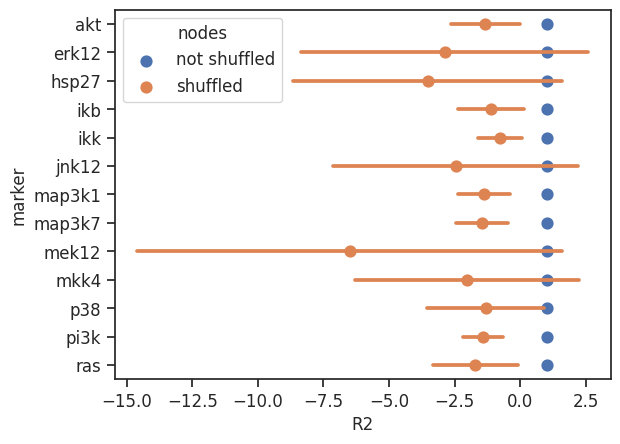

In [14]:
sns.pointplot(data=all_scores, y="marker", x="R2", hue="nodes", linestyles="none", errorbar="sd")
plt.savefig("/dccstor/ipc1/CAR/BFN/Figures/Shuffling_R2.pdf", bbox_inches="tight")

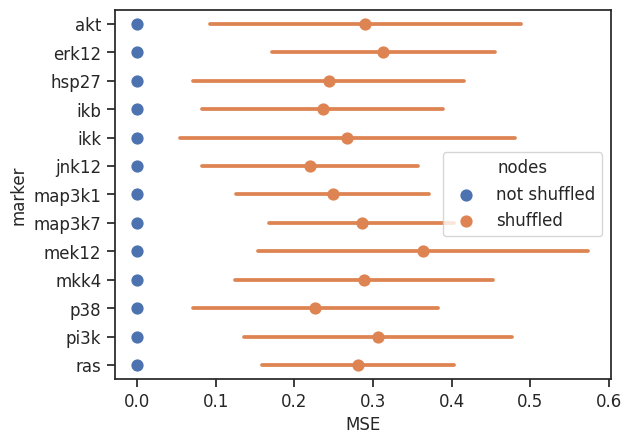

In [15]:
sns.pointplot(data=all_scores, y="marker", x="MSE", hue="nodes", linestyles="none", errorbar="sd")
plt.savefig("/dccstor/ipc1/CAR/BFN/Figures/Shuffling_MSE.pdf", bbox_inches="tight")